In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

This first part of my code is the formula for the binomial probability, and I can change my 3 parameters: n,k and p to get every single probability that I am looking to find in order to get to my solution.

In [2]:
n = 12  # number of coin flips
k = 12   # number of 2's
p = 0.5  # probability of getting a 2 is 0.5 because we are using a fair coin

# Calculate binomial coefficient
binomial_coefficient = math.comb(n, k)

# Calculate probability using the binomial probability formula
probability = binomial_coefficient * (p**k) * ((1-p)**(n-k))

print(f"The probability of getting exactly 1 head in 23 coin flips is: {probability:.4f}")


The probability of getting exactly 1 head in 23 coin flips is: 0.0002


EXTENTION: The first part of my extention will look at the probability of landing on 25 based on my new conditions, where we now have a 3-sided dice with the numbers -1,1,2.

In [3]:
# Define game where I start in the number 1
def simulate_game():
    position = 1
    steps = 0

    # Randomly choose one of the options from the 3-sided dice
    while position < 25:
        dice_result = np.random.choice([-1, 1, 2])
        position += dice_result
        steps += 1

    return steps

# Define the function to find the probability
def calculate_probability(num_simulations):
    successful_simulations = 0

    for _ in range(num_simulations):
        steps = simulate_game()
        if steps <= 100:  # Set a maximum number of steps to avoid infinite loops
            if steps == 25:
                successful_simulations += 1

    probability = successful_simulations / num_simulations
    return probability

# Set the number of simulations
num_simulations = 10000

# Calculate and print the probability
probability = calculate_probability(num_simulations)
print(f"The probability of landing on step 25 is approximately: {probability:.4f}")


The probability of landing on step 25 is approximately: 0.0309


EXTENTION: The second part of my extention looks at how many steps it takes to land on the number 25, when we do land on 25.

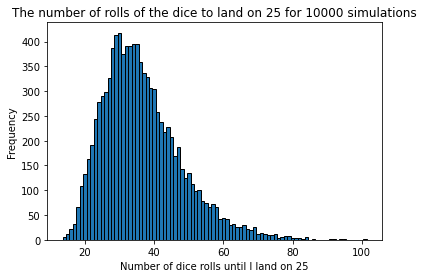

In [4]:
# Define the walk with the same conditions as the last part
def simulate_walk():
    position = 1
    steps = np.array([-1, 1, 2])
    num_steps = 0

    # Randomly choose either -1,1,2
    while position < 25:
        step = np.random.choice(steps)
        position += step
        num_steps += 1

    return num_steps

def run_simulation(num_simulations):
    results = []

    for _ in range(num_simulations):
        steps = simulate_walk()
        results.append(steps)

    return results

# Define and create a histogram to show the simulation
def create_histogram(results):
    plt.hist(results, bins=np.arange(min(results), max(results)+2)-0.5, edgecolor='black')
    plt.xlabel('Number of dice rolls until I land on 25')
    plt.ylabel('Frequency')
    plt.title('The number of rolls of the dice to land on 25 for 10000 simulations')
    plt.show()

# Set the number of simulations
num_simulations = 10000

# Run the simulation
simulation_results = run_simulation(num_simulations)

create_histogram(simulation_results)